In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-06-07 11:39:46.358422: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 11:39:46.358627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 11:39:46.543571: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [5]:
data=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
data.dropna()
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<Axes: xlabel='stroke', ylabel='count'>

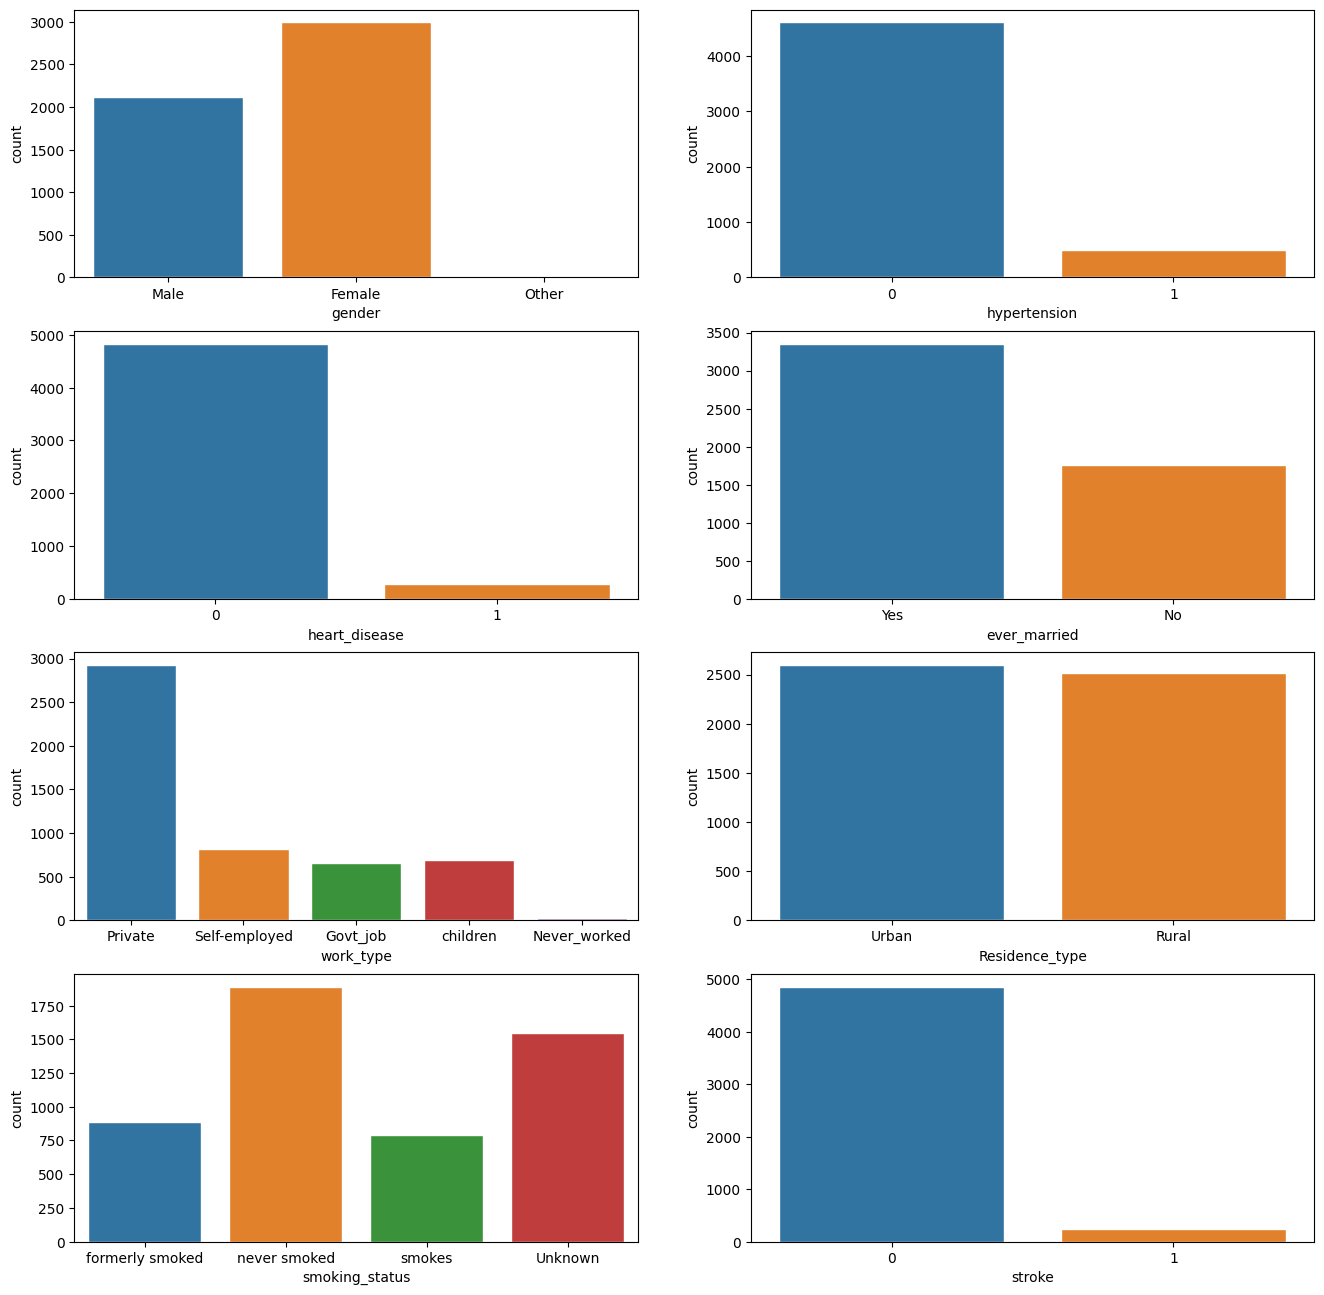

In [7]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

In [8]:
En = LabelEncoder()
df['gender'] = En.fit_transform(data['gender'])
df['ever_married'] = En.fit_transform(data['ever_married'])
df['work_type'] = En.fit_transform(data['work_type'])
df['Residence_type'] = En.fit_transform(data['Residence_type'])
df['smoking_status'] = En.fit_transform(data['smoking_status'])

df.head()

/tmp/ipykernel_34/865778687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = En.fit_transform(data['gender'])
/tmp/ipykernel_34/865778687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married'] = En.fit_transform(data['ever_married'])
/tmp/ipykernel_34/865778687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [9]:
y = df['stroke']
x = df.drop('stroke', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [15]:
#Model 1 - 3 layers with relu and sigmoid activation functions
model = Sequential([
    layers.Dense(25, activation="relu"),
    layers.Dense(50, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [21]:
model.compile(optimizer = "adam",
             loss = tf.keras.losses.BinaryCrossentropy,
             metrics = ["accuracy"])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626 (6.35 KB)

 Trainable params: 1,626 (6.35 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
epochs = 30
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs = epochs)

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9525 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9536 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9536 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9540 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9499 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9489 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9513 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9498 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 9/30
128/128 ━━━━━

In [51]:
#Model 2 - 6 layers with relu and sigmoid activation functions
model = Sequential([
    layers.Dense(125, activation="relu"),
    layers.Dense(100, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(75, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(50, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(1, activation = "sigmoid")
])

In [52]:
model.compile(optimizer = "adam",
             loss = tf.keras.losses.BinaryCrossentropy,
             metrics = ["accuracy"])

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 125)            │         1,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,955 (312.33 KB)

 Trainable params: 26,651 (104.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,304 (208.22 KB)

In [53]:
epochs = 30
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs = epochs)

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9275 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9507 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9540 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9540 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9498 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9516 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9556 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9510 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 9/30
128/128 ━━━━━

In [54]:
#Model 3 - 3 layers with linear and sigmoid activation functions
model = Sequential([
    layers.Dense(50, activation = "linear"),
    layers.Dense(25, activation = "linear", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(1, activation = "sigmoid")
])

In [56]:
model.compile(optimizer = "adam",
             loss = tf.keras.losses.BinaryCrossentropy,
             metrics = ["accuracy"])

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,555 (21.70 KB)

 Trainable params: 1,851 (7.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,704 (14.47 KB)

In [57]:
epochs = 30
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs = epochs)

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9509 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9480 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9418 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9537 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9468 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9498 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9544 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9511 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 9/30
128/128 ━━━━━

In [47]:
#Model 4 - 3 layers with relu and sigmoid activation functions with equal units and L2 regularised
model = Sequential([
    layers.Dense(50, activation = "relu"),
    layers.Dense(50, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(1, activation = "sigmoid")
])

In [48]:
model.compile(optimizer = "adam",
             loss = tf.keras.losses.BinaryCrossentropy,
             metrics = ["accuracy"])

In [ ]:
model.summary()

In [49]:
epochs = 30
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs = epochs)

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9159 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9549 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9539 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9491 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9507 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9494 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 9/30
128/128 ━━━━━

In [21]:
#Model 3 - 12 layers with relu and sigmoid activation functions with L2 regularised
model = Sequential([
    layers.Dense(25, activation = "relu"),
    layers.Dense(25, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(15, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(15, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(15, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(10, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(10, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(10, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(5, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(5, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(5, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(1, activation = "sigmoid")
])

In [22]:
model.compile(optimizer = "adam",
             loss = tf.keras.losses.BinaryCrossentropy,
             metrics = ["accuracy"])

In [ ]:
model.summary()

In [23]:
epochs = 30
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs = epochs)

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8857 - loss: nan - val_accuracy: 0.9442 - val_loss: nan
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: nan - val_accuracy: 0.9442 - val_loss: nan
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9600 - loss: nan - val_accuracy: 0.9442 - val_loss: nan
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9549 - loss: nan - val_accuracy: 0.9442 - val_loss: nan
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: nan - val_accuracy: 0.9442 - val_loss: nan
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9542 - loss: nan - val_accuracy: 0.9442 - val_loss: nan
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9525 - loss: nan - val_accuracy: 0.9442 - val_loss: nan
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9542 - loss: nan - val_accuracy: 0.9442 - val_loss: nan
Epoch 9/30
128/128 ━━━━━

In [64]:
#Model 4 - 4 layers with relu and sigmoid activation functions with L2 equlaliser and inputs units = number of parameters aka x
model = Sequential([
    layers.Dense(10, activation = "relu"),
    layers.Dense(25, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(1, activation = "sigmoid")
])

In [65]:
model.compile(optimizer = "adam",
             loss = tf.keras.losses.BinaryCrossentropy,
             metrics = ["accuracy"])

In [68]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 25)             │           275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,185 (12.45 KB)

 Trainable params: 1,061 (4.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,124 (8.30 KB)

In [67]:
epochs = 30
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs = epochs)

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9513 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9517 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9461 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9504 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9458 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9524 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9569 - loss: nan - val_accuracy: 0.9550 - val_loss: nan
Epoch 9/30
128/128 ━━━━━

In [10]:
#Model 5 - 9 layers with both relu and linear and L2 regulariser
model = Sequential([
    layers.Dense(25, activation = "linear"),
    layers.Dense(25, activation = "linear", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "linear", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "linear", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "linear", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "linear", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(25, activation = "relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(1, activation = "sigmoid")
])

In [11]:
model.compile(optimizer = "adam",
             loss = tf.keras.losses.BinaryCrossentropy,
             metrics = ["accuracy"])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,355 (87.33 KB)

 Trainable params: 7,451 (29.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,904 (58.22 KB)

In [12]:
epochs = 30
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs = epochs)

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9133 - loss: nan - val_accuracy: 0.9530 - val_loss: nan
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9536 - loss: nan - val_accuracy: 0.9530 - val_loss: nan
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9553 - loss: nan - val_accuracy: 0.9530 - val_loss: nan
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9503 - loss: nan - val_accuracy: 0.9530 - val_loss: nan
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9500 - loss: nan - val_accuracy: 0.9530 - val_loss: nan
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9475 - loss: nan - val_accuracy: 0.9530 - val_loss: nan
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: nan - val_accuracy: 0.9530 - val_loss: nan
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9546 - loss: nan - val_accuracy: 0.9530 - val_loss: nan
Epoch 9/30
128/128 ━━━━━